# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [64]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats, lngs) #create list

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [65]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
       # print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | birjand
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | pangody
Processing Record 7 of Set 1 | fortuna
Processing Record 8 of Set 1 | roebourne
Processing Record 9 of Set 1 | port-gentil
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | aqtobe
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | rawson
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | sokoni
Processing Record 18 of Set 1 | juneau
Processing Record 19 of Set 1 | inhambane
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | ayan
Processing Record 22 of Set 1 | nabire
Processing Record 23 of S

Processing Record 39 of Set 4 | sisimiut
Processing Record 40 of Set 4 | alice springs
Processing Record 41 of Set 4 | aligudarz
Processing Record 42 of Set 4 | baruun-urt
Processing Record 43 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 44 of Set 4 | leningradskiy
Processing Record 45 of Set 4 | carnarvon
Processing Record 46 of Set 4 | taltal
Processing Record 47 of Set 4 | sao filipe
Processing Record 48 of Set 4 | portland
Processing Record 49 of Set 4 | alotau
City not found. Skipping...
Processing Record 0 of Set 5 | yar-sale
Processing Record 1 of Set 5 | grand gaube
Processing Record 2 of Set 5 | den helder
Processing Record 3 of Set 5 | umm lajj
Processing Record 4 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 5 of Set 5 | sangar
Processing Record 6 of Set 5 | rio branco
Processing Record 7 of Set 5 | marshfield
Processing Record 8 of Set 5 | burica
City not found. Skipping...
Processing Record 9 of Set 5 | saint george


Processing Record 28 of Set 8 | shimoda
Processing Record 29 of Set 8 | batagay
Processing Record 30 of Set 8 | young
Processing Record 31 of Set 8 | inhuma
Processing Record 32 of Set 8 | preobrazheniye
Processing Record 33 of Set 8 | pyaozerskiy
Processing Record 34 of Set 8 | soma
Processing Record 35 of Set 8 | calama
Processing Record 36 of Set 8 | emmett
Processing Record 37 of Set 8 | le havre
Processing Record 38 of Set 8 | teguise
Processing Record 39 of Set 8 | puerto asis
Processing Record 40 of Set 8 | paamiut
Processing Record 41 of Set 8 | husavik
Processing Record 42 of Set 8 | yirol
City not found. Skipping...
Processing Record 43 of Set 8 | tapaua
City not found. Skipping...
Processing Record 44 of Set 8 | cabo san lucas
Processing Record 45 of Set 8 | muisne
Processing Record 46 of Set 8 | minggang
Processing Record 47 of Set 8 | hinton
Processing Record 48 of Set 8 | alyangula
Processing Record 49 of Set 8 | gursarai
Processing Record 0 of Set 9 | tsihombe
City not f

Processing Record 14 of Set 12 | homestead
Processing Record 15 of Set 12 | collie
Processing Record 16 of Set 12 | lukovetskiy
Processing Record 17 of Set 12 | dien bien
City not found. Skipping...
Processing Record 18 of Set 12 | zhigansk
Processing Record 19 of Set 12 | kavaratti
Processing Record 20 of Set 12 | senmonorom
City not found. Skipping...
Processing Record 21 of Set 12 | longlac
City not found. Skipping...
Processing Record 22 of Set 12 | heyang
Processing Record 23 of Set 12 | emilio carranza
Processing Record 24 of Set 12 | tidore
City not found. Skipping...
Processing Record 25 of Set 12 | lyngseidet
Processing Record 26 of Set 12 | businga
Processing Record 27 of Set 12 | norman wells
Processing Record 28 of Set 12 | lagos de moreno
Processing Record 29 of Set 12 | meyungs
City not found. Skipping...
Processing Record 30 of Set 12 | barranca
Processing Record 31 of Set 12 | thiruvananthapuram
Processing Record 32 of Set 12 | pavlovka
Processing Record 33 of Set 12 | 

In [66]:
city_data

[{'City': 'punta arenas',
  'Lat': -53.15,
  'Lng': -70.9167,
  'Max Temp': 4.06,
  'Humidity': 75,
  'Cloudiness': 75,
  'Wind Speed': 5.66,
  'Country': 'CL',
  'Date': 1681707819},
 {'City': 'bluff',
  'Lat': -46.6,
  'Lng': 168.3333,
  'Max Temp': 17.03,
  'Humidity': 68,
  'Cloudiness': 99,
  'Wind Speed': 2.33,
  'Country': 'NZ',
  'Date': 1681707820},
 {'City': 'birjand',
  'Lat': 32.8663,
  'Lng': 59.2211,
  'Max Temp': 16.26,
  'Humidity': 27,
  'Cloudiness': 100,
  'Wind Speed': 0,
  'Country': 'IR',
  'Date': 1681707639},
 {'City': 'vaini',
  'Lat': -21.2,
  'Lng': -175.2,
  'Max Temp': 26.09,
  'Humidity': 83,
  'Cloudiness': 75,
  'Wind Speed': 8.23,
  'Country': 'TO',
  'Date': 1681707820},
 {'City': 'pangody',
  'Lat': 65.85,
  'Lng': 74.4859,
  'Max Temp': -15.46,
  'Humidity': 90,
  'Cloudiness': 100,
  'Wind Speed': 6.5,
  'Country': 'RU',
  'Date': 1681707821},
 {'City': 'fortuna',
  'Lat': 40.5982,
  'Lng': -124.1573,
  'Max Temp': 9.08,
  'Humidity': 88,
  'Cloudin

In [67]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
print(city_data_df)

# Show Record Count
city_data_df.count()

             City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0    punta arenas -53.1500  -70.9167      4.06        75          75   
1           bluff -46.6000  168.3333     17.03        68          99   
2         birjand  32.8663   59.2211     16.26        27         100   
3           vaini -21.2000 -175.2000     26.09        83          75   
4         pangody  65.8500   74.4859    -15.46        90         100   
..            ...      ...       ...       ...       ...         ...   
554         nalut  30.3333   10.8500     12.11        43           0   
555        jacmel  18.2342  -72.5347     23.91        85           4   
556   kangaatsiaq  68.3065  -53.4641     -6.70        87          97   
557          tura  25.5198   90.2201     35.21        28           2   
558       duekoue   6.7472   -7.3496     23.68        96          75   

     Wind Speed Country        Date  
0          5.66      CL  1681707819  
1          2.33      NZ  1681707820  
2          0.00      

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [68]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,4.06,75,75,5.66,CL,1681707819
1,bluff,-46.6000,168.3333,17.03,68,99,2.33,NZ,1681707820
2,birjand,32.8663,59.2211,16.26,27,100,0.00,IR,1681707639
3,vaini,-21.2000,-175.2000,26.09,83,75,8.23,TO,1681707820
4,pangody,65.8500,74.4859,-15.46,90,100,6.50,RU,1681707821


In [69]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [70]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,4.06,75,75,5.66,CL,1681707819
1,bluff,-46.6000,168.3333,17.03,68,99,2.33,NZ,1681707820
2,birjand,32.8663,59.2211,16.26,27,100,0.00,IR,1681707639
3,vaini,-21.2000,-175.2000,26.09,83,75,8.23,TO,1681707820
4,pangody,65.8500,74.4859,-15.46,90,100,6.50,RU,1681707821


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

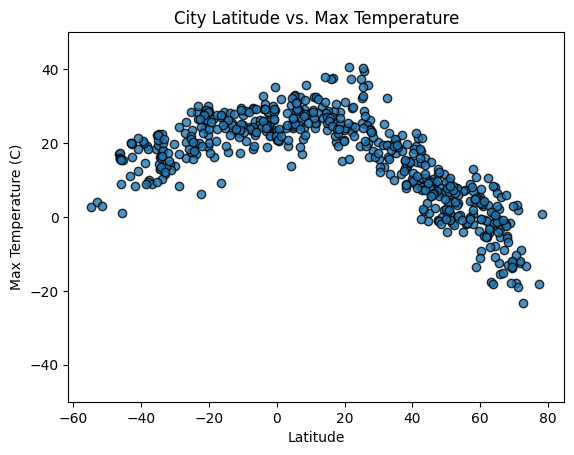

In [88]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors = "black", linewidths=1, marker ="o", alpha = 0.8)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.ylim(-50, 50)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

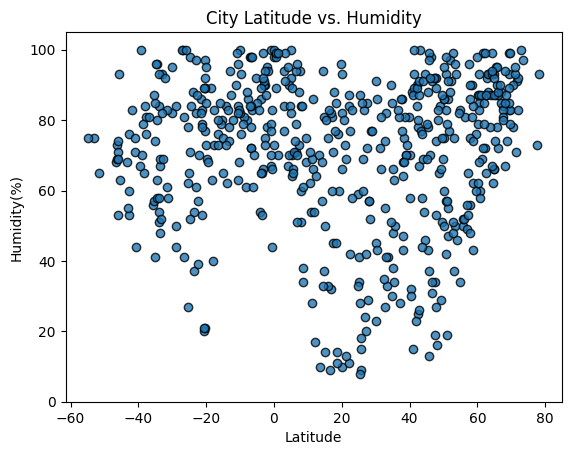

In [72]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors = "black", linewidths=1, marker ="o", alpha = 0.8)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.ylim(0,105)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

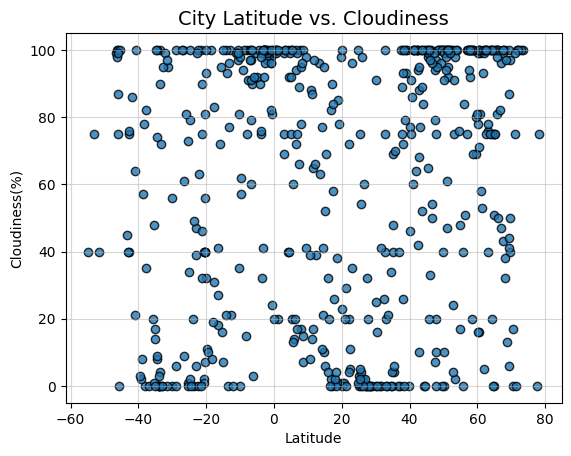

In [73]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors = "black", linewidths=1, marker ="o", alpha = 0.8)
plt.title("City Latitude vs. Cloudiness", fontsize =14)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(alpha=0.5)
plt.ylim(-5,105)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

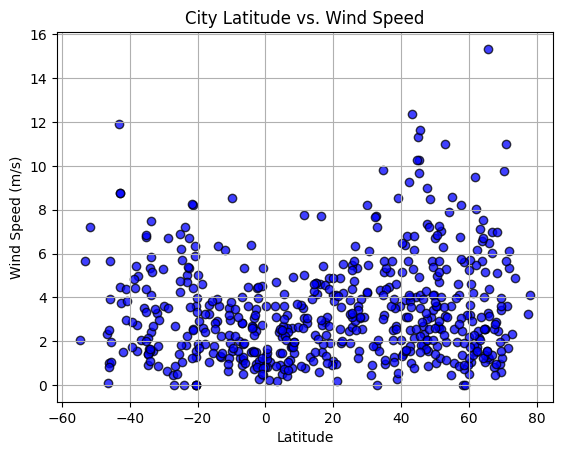

In [91]:
x_axis = city_data_df["Lat"]
y_axis = city_data_df['Wind Speed']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "blue", edgecolors = "black", alpha = .75)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f"City Latitude vs. Wind Speed")
plt.grid()
plt.savefig('output_data/figure_4.png')
plt.show()

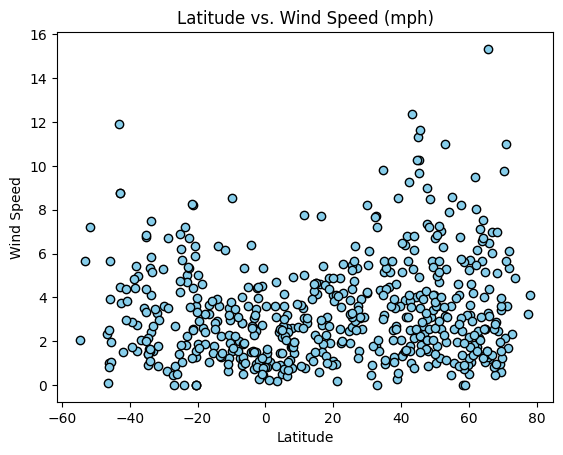

<Figure size 640x480 with 0 Axes>

In [92]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black", facecolors="skyblue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed (mph)")


plt.show()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [78]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
df = pd.DataFrame(city_data)
northern_hemi_df = df[df["Lat"]>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,birjand,32.8663,59.2211,16.26,27,100,0.00,IR,1681707639
4,pangody,65.8500,74.4859,-15.46,90,100,6.50,RU,1681707821
5,fortuna,40.5982,-124.1573,9.08,88,86,1.39,US,1681707821
9,aqtobe,50.2797,57.2072,2.05,60,0,1.00,KZ,1681707757
13,albany,42.6001,-73.9662,17.73,78,42,1.79,US,1681707602


In [79]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
df= pd.DataFrame(city_data)
southern_hemi_df = df[df["Lat"]< 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,4.06,75,75,5.66,CL,1681707819
1,bluff,-46.6000,168.3333,17.03,68,99,2.33,NZ,1681707820
3,vaini,-21.2000,-175.2000,26.09,83,75,8.23,TO,1681707820
6,roebourne,-20.7833,117.1333,28.93,20,2,5.90,AU,1681707821
7,port-gentil,-0.7193,8.7815,26.24,83,100,5.32,GA,1681707822


###  Temperature vs. Latitude Linear Regression Plot

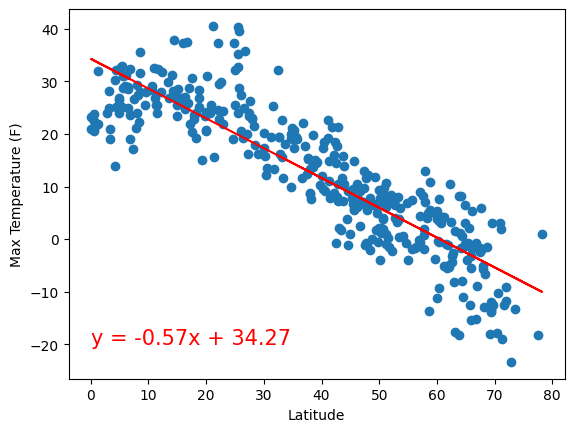

The r-value: -0.8805505143124415


<Figure size 640x480 with 0 Axes>

In [80]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker ="o")
slope, intercept, r_value, p_value, std_err =linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regress_values =northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (0,-20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()
print(f"The r-value: {r_value}")
plt.savefig("output_data/Fig6.png")

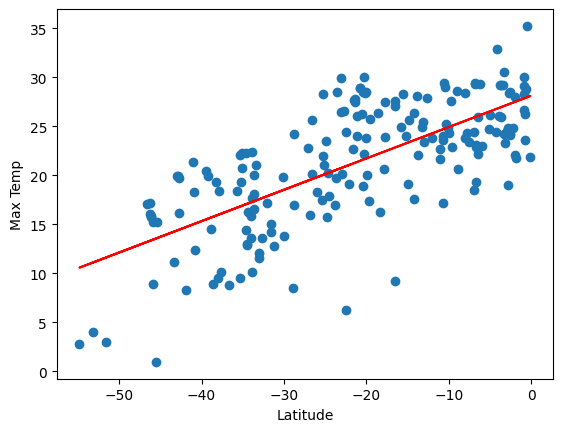

The r-value: 0.1853160509805122


In [96]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o")
slope, intercept, rvalue, pvalue, stderr =linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regress_values =southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq,(0,-20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()
print(f"The r-value: {r_value}")

**Discussion about the linear relationship:** As we can see in in the two charts above us there is a relationship between the latitude and maximum temperature. The closer the latitude is to the equator , the higher the temperature is. The further away we move from the equator, the temperature decreases the most. 

### Humidity vs. Latitude Linear Regression Plot

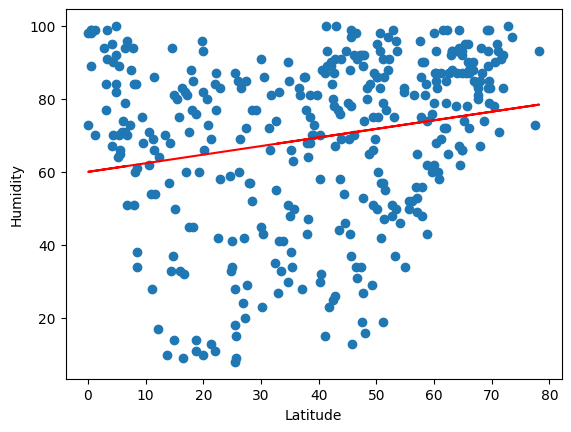

The r-value: 0.21008647967897967


<Figure size 640x480 with 0 Axes>

In [82]:
# Northern Hemisphere
# YOUR CODE HERE
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker ="o")
slope, intercept, r_value, p_value, std_err =linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regress_values =northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (0,-20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()
print(f"The r-value: {r_value}")
plt.savefig("output_data/Fig8.png")

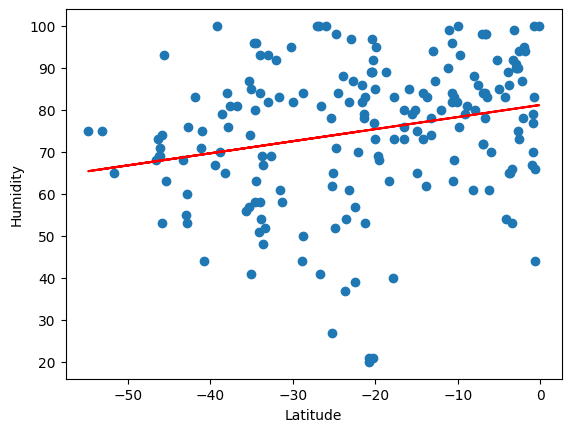

The r-value: 0.24116362998868393


<Figure size 640x480 with 0 Axes>

In [83]:
# Southern Hemisphere
# YOUR CODE HERE
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker ="o")
slope, intercept, r_value, p_value, std_err =linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regress_values =southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (0,-20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()
print(f"The r-value: {r_value}")
plt.savefig("output_data/Fig9.png")

**Discussion about the linear relationship:**  The linear regression plot shows a slightly posivite correlation between the latitude and humidity. The r-values for both plots indicate that the correlation is not strong. 

### Cloudiness vs. Latitude Linear Regression Plot

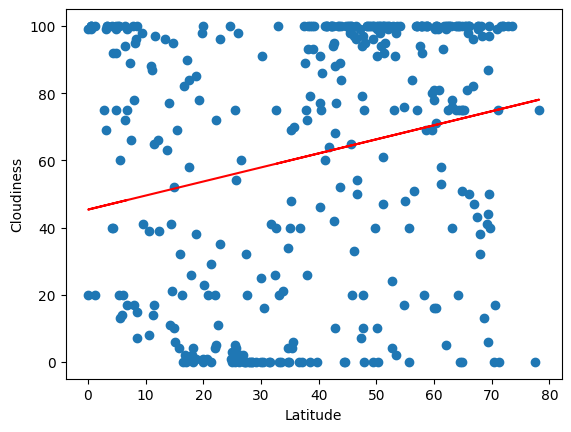

The r-value: 0.22445951967487976


<Figure size 640x480 with 0 Axes>

In [84]:
# Northern Hemisphere
# YOUR CODE HERE
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker ="o")
slope, intercept, r_value, p_value, std_err =linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regress_values =northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (0,-20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()
print(f"The r-value: {r_value}")
plt.savefig("output_data/Fig10.png")

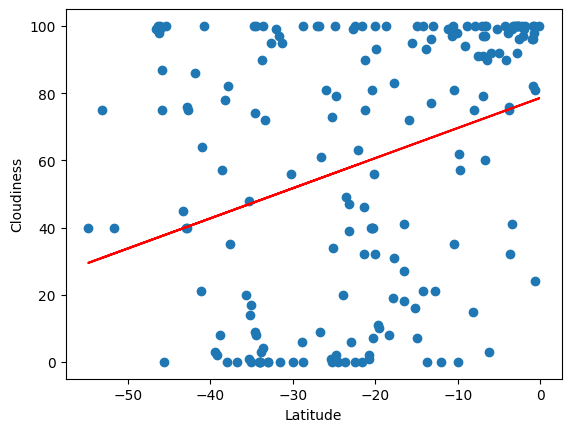

The r-value: 0.3210149666976773


<Figure size 640x480 with 0 Axes>

In [85]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker ="o")
slope, intercept, r_value, p_value, std_err =linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regress_values =southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (0,-20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()
print(f"The r-value: {r_value}")
plt.savefig("output_data/Fig11.png")

**Discussion about the linear relationship:** Both plots show that the further away the Latitude is from the equator, the least cloudy it will be. The relationship is not very strong, so there might be other factors that need to be taken into consideration. 

### Wind Speed vs. Latitude Linear Regression Plot

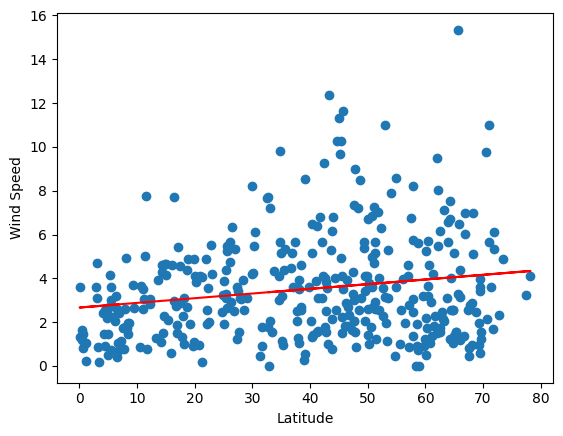

The r-value: 0.1853160509805122


<Figure size 640x480 with 0 Axes>

In [97]:
# Northern Hemisphere
# YOUR CODE HERE
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker ="o")
slope, intercept, r_value, p_value, std_err =linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regress_values =northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (0,-20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()
print(f"The r-value: {r_value}")
plt.savefig("output_data/Fig12.png")


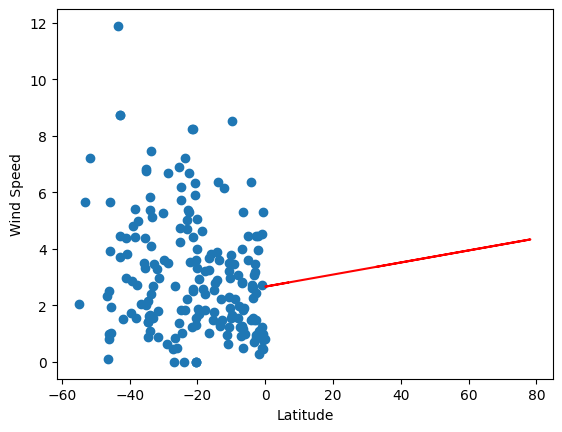

The r-value: 0.1853160509805122


<Figure size 640x480 with 0 Axes>

In [98]:
# Southern Hemisphere
# YOUR CODE HERE
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker ="o")
slope, intercept, r_value, p_value, std_err =linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regress_values =northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (0,-20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()
print(f"The r-value: {r_value}")
plt.savefig("output_data/Fig13.png")

**Discussion about the linear relationship:** The linear regression plots show that there is slight positive correlation between Wind Speed between the Northern Hemisphere and Southern Hemisphere. 